In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np
import collections
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# set data directory
data_dir = "C:/Users/tysir/Documents/Emotion_Recognition"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

In [3]:
# resize to standard FER2013 size
img_size = (48, 48)

In [4]:
# set up image generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=32,
    shuffle=True)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=32,
    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
print("Class indices (label mapping):")
print(train_data.class_indices)

Class indices (label mapping):
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [6]:
class_names = list(train_data.class_indices.keys())
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


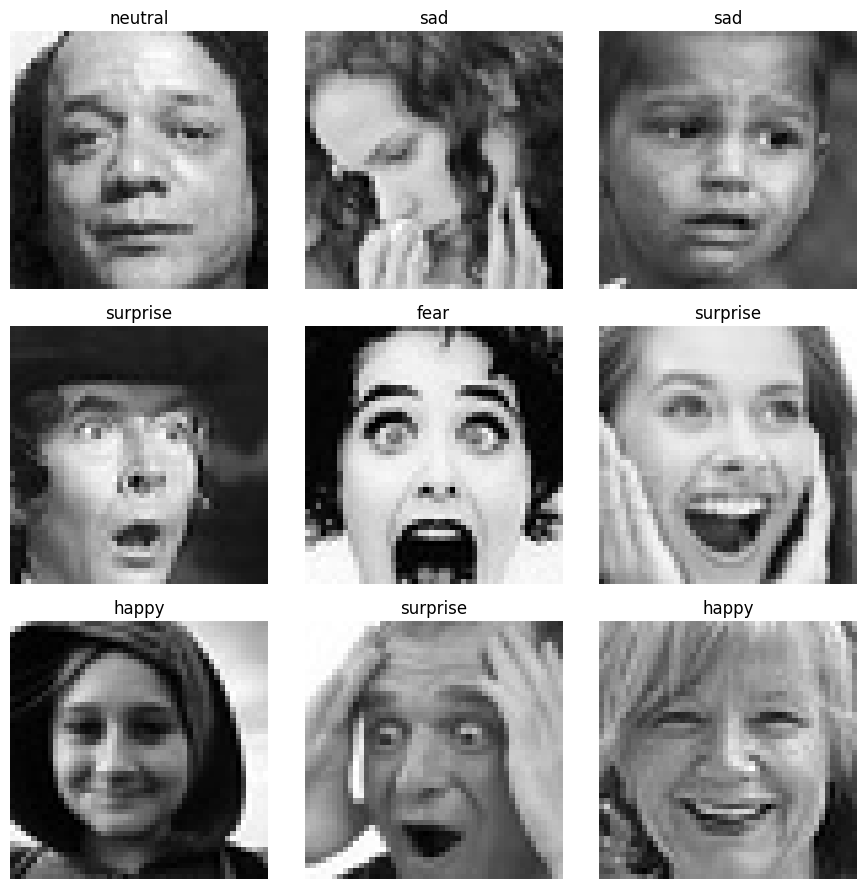

In [8]:
images, labels = next(train_data)

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(48, 48), cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
print("Image shape:", images[0].shape)
print("Label (one-hot):", labels[0])

Image shape: (48, 48, 1)
Label (one-hot): [0. 0. 0. 0. 1. 0. 0.]


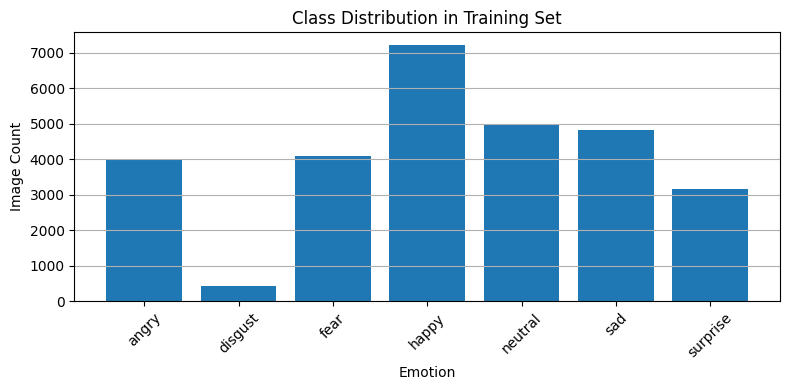

In [11]:
# get class counts from the training directory
class_counts = collections.Counter(train_data.classes)
class_labels = list(train_data.class_indices.keys())

plt.figure(figsize=(8, 4))
plt.bar(class_labels, [class_counts[i] for i in range(len(class_labels))])
plt.title("Class Distribution in Training Set")
plt.xlabel("Emotion")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

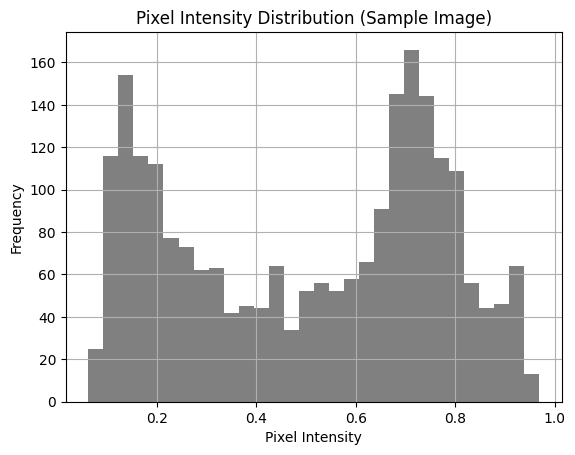

In [12]:
flattened_pixels = images[0].flatten()

plt.hist(flattened_pixels, bins=30, color='gray')
plt.title("Pixel Intensity Distribution (Sample Image)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [13]:
# dictionary to hold sum of images and counts
class_sums = {class_name: np.zeros((48, 48)) for class_name in class_names}
class_counts = {class_name: 0 for class_name in class_names}

# loop
for _ in range(len(train_data)):
    images, labels = next(train_data)
    for i in range(len(images)):
        label_index = np.argmax(labels[i])
        class_name = class_names[label_index]
        img = images[i].reshape(48, 48)  # remove channel dimension
        class_sums[class_name] += img
        class_counts[class_name] += 1

# compute averages
class_averages = {
    name: class_sums[name] / class_counts[name] for name in class_names}

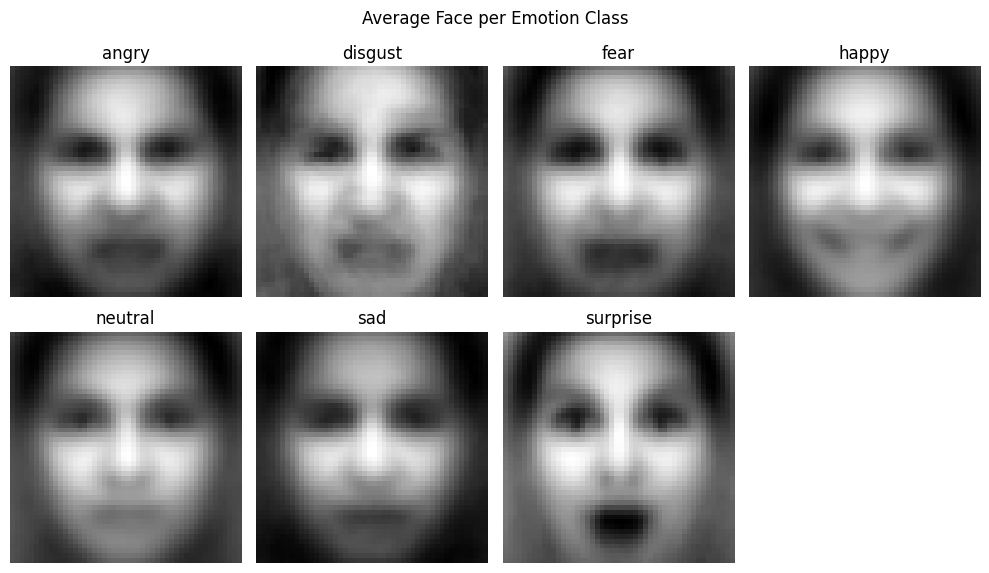

In [14]:
# plot
plt.figure(figsize=(10, 6))
for i, (class_name, avg_img) in enumerate(class_averages.items()):
    plt.subplot(2, 4, i + 1)
    plt.imshow(avg_img, cmap='gray')
    plt.title(class_name)
    plt.axis('off')
plt.suptitle("Average Face per Emotion Class")
plt.tight_layout()
plt.show()